<a href="https://colab.research.google.com/github/zhh25/Titanic/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the data 

In [ ]:
import pandas as pd
import os

In [ ]:
path_root = 'data'
train = pd.read_csv(os.path.join(path_root, 'train.csv'))
test =  pd.read_csv(os.path.join(path_root, 'test.csv'))
sample_submission =  pd.read_csv(os.path.join(path_root, 'sample_submission.csv'))

### Take a quick look at the data structure

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'Age', 'Cabin' and 'Embarked' have missing_value. 

In [ ]:
cat_attributes = train.columns[train.dtypes == 'object']
for attrib_name in cat_attributes:
    print( attrib_name)
    print('number of unique elements: ', train[attrib_name].nunique(dropna=False))
    print(train[attrib_name].value_counts())
    print()

Name
number of unique elements:  891
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Sex
number of unique elements:  2
male      577
female    314
Name: Sex, dtype: int64

Ticket
number of unique elements:  681
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Cabin
number of unique elements:  148
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26 

In [ ]:
train[train.Ticket == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [ ]:
len(set(train.Ticket.unique()).intersection(set(test.Ticket.unique())))

115

In [ ]:
titanic = train.copy()
titanic['Family'] = titanic.Parch + titanic.SibSp

titanic['Fare_per_person'] = titanic.Fare / (titanic.Family + 1)

print('correlation between Survived and Fare:', titanic['Survived'].corr(titanic.Fare))
print('correlation between Survived and Fare_per_person:', titanic['Survived'].corr(titanic.Fare_per_person))

correlation between Survived and Fare: 0.2573065223849622
correlation between Survived and Fare_per_person: 0.22159990528456922


- name: is unique for everyone.  Mr. and Mrs might contain useful information (husband and wife)
- sex: male is the majority
- Ticket: some people bought ticket together, you need to find fare/person. However, people with same ticket number have been spreaded into train and test sets.  Let assume families bought ticket together, that is, fare_per_person = fare / family. Fare_per_person is less correlated with Suvived comparing with Fare.  In the Data Descreptiton, it is said that the fare is 'Passenger fare'.  So it might already by per_person
- Cabin: 
    - some people share a cabin
    - the first letter of cabin id might represent the class of cabin
    - some cabins have been combined into one (a luxury suit?)
    - why there is no cabin shared by a lot of people (like a low-class cabin) Is NaN the low-class Cabin
- Embarked: what does missing value mean? only two missing_value, so not a big deal
 

In [ ]:
cat_attributes

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

describe() method shows a summary of numeric attributes

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- PassengerId may not contain any useful information, hence should not be used as input feature.
- Survived: about 38% survived.  So the two classes are almost balance
- Pclass: ordinal variable.  it seems that 1 represents first (best) class and 3 represent 3rd (cheapest) class.
- SibSp: siblings and spouse
- Parch: parents and children



plot a histogram for each numerical attributes

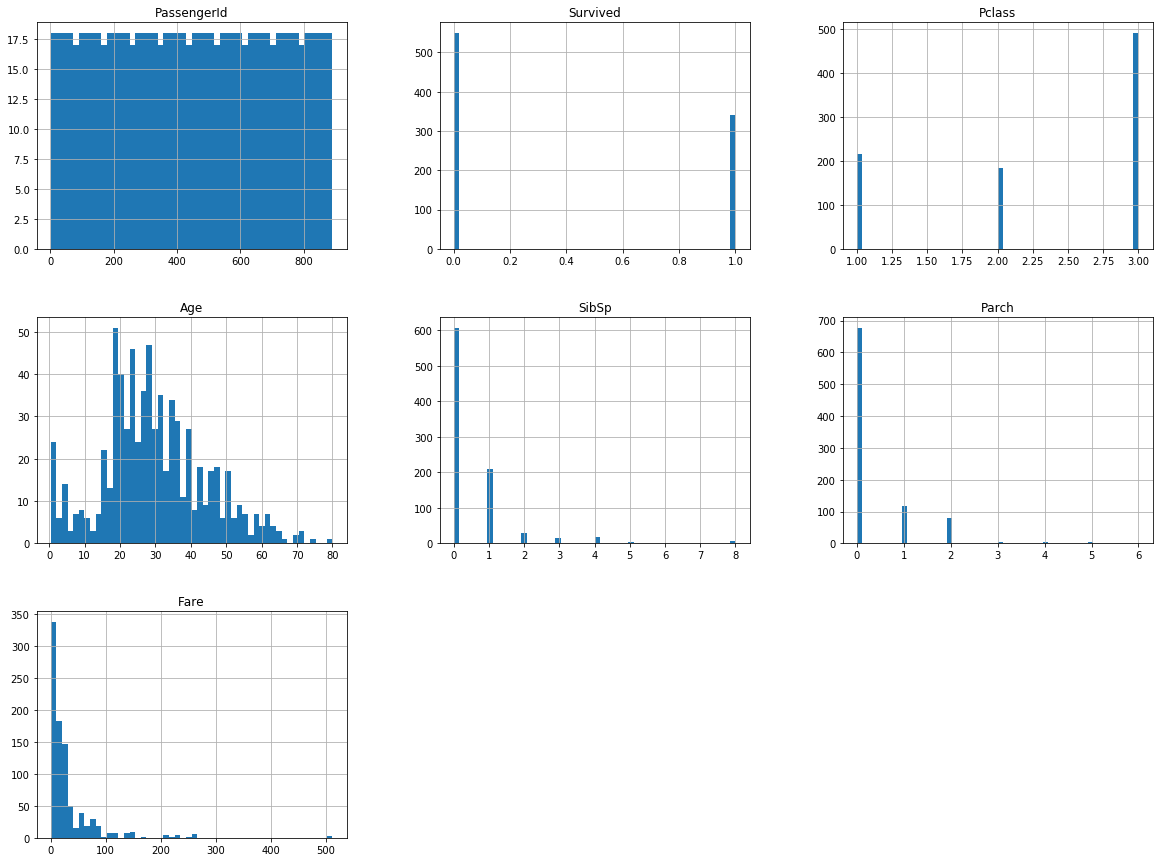

In [ ]:
import matplotlib.pyplot as plt
train.hist(bins = 50, figsize=(20,15))
plt.show()

- Fare: 
    - is this fare per person or per ticket. Because some ticket contains more than one passenger.
    - Long right tail. Consider log tranformation
- SibSp / Parch: 
    - Consider combining some groups 

### Looking for correlation

In [ ]:
titanic = train.copy()

In [ ]:
corr_matrix = titanic.corr()

In [ ]:
corr_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

- Pclass and Fare are useful attributes
- PassengerId is not useful

### Analyze by pivoting features

In [ ]:
attributes = ['Pclass', 'Sex', 'Embarked', 'Parch', 'SibSp']

for attrib in attributes:
    print(titanic[[attrib] + ['Survived']].groupby(by = attrib, dropna= False).aggregate(['mean', 'count']))
    print()

        Survived      
            mean count
Pclass                
1       0.629630   216
2       0.472826   184
3       0.242363   491

        Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

          Survived      
              mean count
Embarked                
C         0.553571   168
Q         0.389610    77
S         0.336957   644
NaN       1.000000     2

       Survived      
           mean count
Parch                
0      0.343658   678
1      0.550847   118
2      0.500000    80
3      0.600000     5
4      0.000000     4
5      0.200000     5
6      0.000000     1

       Survived      
           mean count
SibSp                
0      0.345395   608
1      0.535885   209
2      0.464286    28
3      0.250000    16
4      0.166667    18
5      0.000000     5
8      0.000000     7



- Pclass: Better class, higher survival rate
- Sex: female have higher survival chance
- Embarked: 
    - C has higher survival chance (why)
    - Q and S have similar survival chance (combine them)
    - only two missing values
- Parch / SibSp
    - behavior very similar
    - consider subgroup as (=0) (=1) (>=2)
    

In [ ]:
titanic['Family'] = titanic.Parch + titanic.SibSp
print(titanic[['Family'] + ['Survived']]
      .groupby(by = 'Family', dropna= False)
      .aggregate(['mean', 'count']))

        Survived      
            mean count
Family                
0       0.303538   537
1       0.552795   161
2       0.578431   102
3       0.724138    29
4       0.200000    15
5       0.136364    22
6       0.333333    12
7       0.000000     6
10      0.000000     7


- Family: Purity of each subgroup improved

### Analyze by visualizing data

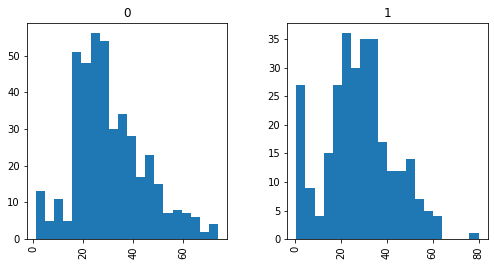

In [ ]:
titanic[['Age', 'Survived']].hist(column = 'Age', by = 'Survived', 
                                  bins = 20, figsize = (8,4))
plt.show()

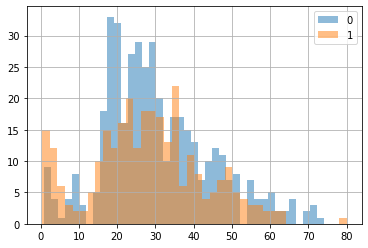

In [ ]:
train.groupby(by = 'Survived', dropna=False)['Age'].hist(alpha = 0.5, bins = 40, legend = True)
plt.show()

- Babies (<6 years old) have high survival rate
- senior (> 65 years older) have low survival rate

In [ ]:
import numpy as np

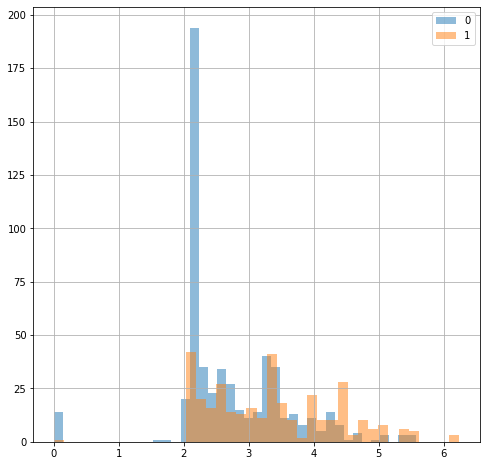

In [ ]:
titanic['LogFare'] = np.log(titanic.Fare + 1) # min(Fare) = 0
titanic.groupby('Survived')['LogFare'].hist(
    alpha = 0.5, bins = 40, legend = True, figsize = (8,8))
plt.show()

- LogFare: in general people with higher fare have higher survival chance 

In [ ]:
sum(titanic.Cabin.isnull())

687

In [ ]:
titanic['Cabin_Letter'] = titanic.Cabin.str.get(0)
print(titanic['Cabin_Letter'].value_counts(dropna= False))
titanic.groupby('Cabin_Letter', dropna = False)['Survived'].agg(['mean', 'count'])


NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin_Letter, dtype: int64


,mean,count
Cabin_Letter,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
NaN,0.299854,687


- Cabin_Letter: NaN is siginificantly different from others , treat NaN as one class and all the others as another class

In [ ]:
titanic.groupby('Cabin_Letter', dropna = False)['Fare'].mean()

Cabin_Letter
A       39.623887
B      113.505764
C      100.151341
D       57.244576
E       46.026694
F       18.696792
G       13.581250
T       35.500000
NaN     19.157325
Name: Fare, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [ ]:
titanic = train.copy()
titanic_label = train['Survived'].copy()

### Feature Engineer 

###### SibSp and Parch

In [ ]:
def compare_corr_with_survived(attrib_1, attrib_2):
    print('correlation between Survived and ' + attrib_1 +' : ', 
          titanic_label.corr(titanic[attrib_1]))
    print('correlation between Survived and ' + attrib_2 +' : ', 
          titanic_label.corr(titanic[attrib_2]))

In [ ]:
titanic['Family'] = titanic.SibSp + titanic.Parch
compare_corr_with_survived('SibSp', 'Family')
compare_corr_with_survived('Parch', 'Family')

correlation between Survived and SibSp :  -0.035322498885735576
correlation between Survived and Family :  0.01663898928274525
correlation between Survived and Parch :  0.0816294070834836
correlation between Survived and Family :  0.01663898928274525


- Family is less informative than Parch and SibSp

In [ ]:
titanic['Family'] = titanic.Parch + titanic.SibSp
print(titanic[['Family'] + ['Survived']]
      .groupby(by = 'Family', dropna= False)
      .aggregate(['mean', 'count']))

        Survived      
            mean count
Family                
0       0.303538   537
1       0.552795   161
2       0.578431   102
3       0.724138    29
4       0.200000    15
5       0.136364    22
6       0.333333    12
7       0.000000     6
10      0.000000     7


In [ ]:
titanic['Family_recode'] = titanic['Family'].replace(
    to_replace = [0,1,2,3, 4, 5, 6, 7, 8, 9,10,11,12,13],
    value =      [0,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
)

In [ ]:
compare_corr_with_survived('Family', 'Family_recode')

correlation between Survived and Family :  0.01663898928274525
correlation between Survived and Family_recode :  0.2838096297303865


In [ ]:
print(titanic[['SibSp'] + ['Survived'] +['Fare']]
      .groupby(by = 'SibSp', dropna= False)
      .aggregate(['mean', 'count']))

       Survived             Fare      
           mean count       mean count
SibSp                                 
0      0.345395   608  25.692028   608
1      0.535885   209  44.147370   209
2      0.464286    28  51.753718    28
3      0.250000    16  68.908862    16
4      0.166667    18  31.855556    18
5      0.000000     5  46.900000     5
8      0.000000     7  69.550000     7


In [ ]:
titanic['SibSp_recode'] = titanic['SibSp'].replace(
    to_replace = [0,1,2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13],
    value =      [0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
    #value =      [0,1,1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
)

compare_corr_with_survived('SibSp', 'SibSp_recode')

correlation between Survived and SibSp :  -0.035322498885735576
correlation between Survived and SibSp_recode :  0.19786160135164008


In [ ]:
print(titanic[['Parch'] + ['Survived']+['Fare']]
      .groupby(by = 'Parch', dropna= False)
      .aggregate(['mean', 'count']))

       Survived             Fare      
           mean count       mean count
Parch                                 
0      0.343658   678  25.586774   678
1      0.550847   118  46.778180   118
2      0.500000    80  64.337604    80
3      0.600000     5  25.951660     5
4      0.000000     4  84.968750     4
5      0.200000     5  32.550000     5
6      0.000000     1  46.900000     1


In [ ]:
titanic['Parch_recode'] = titanic['Parch'].replace(
    to_replace = [0,1,2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13],
   #value =      [0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
    value =      [0,1,1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
)

compare_corr_with_survived('Parch', 'Parch_recode')

correlation between Survived and Parch :  0.0816294070834836
correlation between Survived and Parch_recode :  0.12424527580169718


###### Fare

In [ ]:
import numpy as np
titanic['Fare_log'] = np.log(titanic.Fare + 1)
compare_corr_with_survived('Fare', 'Fare_log')

correlation between Survived and Fare :  0.2573065223849622
correlation between Survived and Fare_log :  0.3298621286968071


### drop some attributes 

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Family_recode', 'SibSp_recode', 'Parch_recode', 'Fare_log'],
      dtype='object')

In [ ]:
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1,  inplace = True)

### missing_value

In [ ]:
titanic ['Cabin_isna'] = titanic['Cabin'].isnull().astype('int')
titanic.drop('Cabin', axis = 1,  inplace = True)

In [ ]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_isna
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_attributes = ['Age', 'SibSp', 'Parch', 'Fare']
ordinal_attributes = ['Pclass', 'Cabin_isna']
cat_attributes = ['Sex', 'Embarked']

In [ ]:
imputer_median = SimpleImputer(strategy='median')
imputer_median.fit(titanic[num_attributes])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer_median.statistics_

array([28.    ,  0.    ,  0.    , 14.4542])

In [ ]:
titanic[num_attributes] = imputer_median.transform(titanic[num_attributes])

In [ ]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_isna
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,1


In [ ]:
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
titanic[cat_attributes] = imputer_most_frequent.fit_transform(titanic[cat_attributes])

In [ ]:
np.sum(titanic.isnull())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_isna     0
dtype: int64

###### Age

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
discretizer_age = KBinsDiscretizer(n_bins=20, encode = 'ordinal', strategy='uniform')
discretizer_age.fit(titanic[['Age']])

KBinsDiscretizer(encode='ordinal', n_bins=20, strategy='uniform')

In [ ]:
bin_edges = discretizer_age.bin_edges_[0]
len(bin_edges)

21

In [ ]:
titanic[['Age_discret']] = discretizer_age.transform(titanic[['Age']])

In [ ]:
temp = titanic.groupby('Age_discret')['Survived'].agg(['mean', 'count'])
temp = pd.DataFrame(temp)
pd.concat([temp, pd.Series( bin_edges[1:], name = 'edge')], axis = 1)

,mean,count,edge
0.0,0.675000,40,4.399
1.0,0.642857,14,8.378
2.0,0.266667,15,12.357
3.0,0.483871,31,16.336
4.0,0.341772,79,20.315
5.0,0.367347,98,24.294
6.0,0.312977,262,28.273
7.0,0.416667,84,32.252
8.0,0.479452,73,36.231
9.0,0.377778,45,40.210


- Yong child (<=8 years old) has high survival chance
- senior ( >= 65 years old) has low survival chance

In [ ]:
compare_corr_with_survived('Age', 'Age_discret')

correlation between Survived and Age :  -0.06491041993052585
correlation between Survived and Age_discret :  -0.06916032144442762


In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
binarizer_baby = Binarizer(threshold=8.3).fit(titanic[['Age']])
binarizer_senior = Binarizer(threshold=64.1).fit(titanic[['Age']]

In [ ]:
titanic[['Age_baby']] = binarizer_baby.transform(titanic[['Age']])
titanic[['Age_senior']] = binarizer_senior.transform(titanic[['Age']])

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_recode,SibSp_recode,Parch_recode,Fare_log,Cabin_isna,Age_discret,Age_baby,Age_senior
0,0,3,male,22.0,1.0,0.0,7.2500,S,1,1,1,0,2.110213,1,5.0,1.0,0.0
1,1,1,female,38.0,1.0,0.0,71.2833,C,1,1,1,0,4.280593,0,9.0,1.0,0.0
2,1,3,female,26.0,0.0,0.0,7.9250,S,0,0,0,0,2.188856,1,6.0,1.0,0.0
3,1,1,female,35.0,1.0,0.0,53.1000,S,1,1,1,0,3.990834,0,8.0,1.0,0.0
4,0,3,male,35.0,0.0,0.0,8.0500,S,0,0,0,0,2.202765,1,8.0,1.0,0.0
